In [24]:
### 1COD_ANU — Code Année Universitaire   2015
### 2. COD_ETU — Code Étudiant
### 3. COD_ELP — Code Élément Pédagogique
### 4. NOT_ELP — Note obtenue à l’Élément Pédagogique
### 5. COD_TRE — Code Traitement V / RAT /ADMIS / VAR / NV
### 6. COD_SES — Code Session  1 / 2


In [25]:
import pandas as pd

df = pd.read_csv(
    "/Users/hamzacharmaqe/Documents/LastYear/Data_Quality/Project/projet-data-quality-main/data/raw/dataset_metier.txt",
    header=None,
    names=["COD_ANU", "COD_ETU", "COD_ELP", "NOT_ELP", "COD_TRE", "COD_SES", "EXTRA"],
    engine="python",
    skiprows =1
)

print("\n🔍 Aperçu du dataset :")
display(df.head())

print("\n📦 Structure du dataset :")
df.info()



🔍 Aperçu du dataset :


,COD_ANU,COD_ETU,COD_ELP,NOT_ELP,COD_TRE,COD_SES,EXTRA
0,2015,7847033,JFE35204,NaN,NaN,2,NaN
1,2015,7847033,JFE35304,11.0,V,1,NaN
2,2015,7847033,JFE35304,NaN,NaN,2,NaN
3,2015,381430,JFA35104,14.0,V,1,NaN
4,2015,381430,JFA35104,NaN,NaN,2,NaN



📦 Structure du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1769964 entries, 0 to 1769963
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   COD_ANU  int64  
 1   COD_ETU  int64  
 2   COD_ELP  object 
 3   NOT_ELP  float64
 4   COD_TRE  object 
 5   COD_SES  object 
 6   EXTRA    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 94.5+ MB


In [26]:
print("\n📊 Statistiques générales :")
display(df.describe(include='all'))



📊 Statistiques générales :


,COD_ANU,COD_ETU,COD_ELP,NOT_ELP,COD_TRE,COD_SES,EXTRA
count,1769964.0,1.769964e+06,1769964,969281.000000,1068085,1710496,391605.000000
unique,NaN,NaN,6161,NaN,1014,15,NaN
top,NaN,NaN,JFA10004,NaN,ABSN,2,NaN
freq,NaN,NaN,11885,NaN,164686,752280,NaN
mean,2015.0,7.836008e+06,NaN,7.906266,NaN,NaN,1.329605
std,0.0,6.197744e+05,NaN,4.674533,NaN,NaN,0.470070
min,2015.0,3.000070e+05,NaN,0.000000,NaN,NaN,1.000000
25%,2015.0,7.867571e+06,NaN,4.000000,NaN,NaN,1.000000
50%,2015.0,7.892970e+06,NaN,9.000000,NaN,NaN,1.000000
75%,2015.0,7.910469e+06,NaN,11.000000,NaN,NaN,2.000000


In [27]:
print("\n❗ Taux de valeurs manquantes par colonne :")
missing = df.isna().mean().round(3) * 100
display(missing)



❗ Taux de valeurs manquantes par colonne :


COD_ANU     0.0
COD_ETU     0.0
COD_ELP     0.0
NOT_ELP    45.2
COD_TRE    39.7
COD_SES     3.4
EXTRA      77.9
dtype: float64

In [28]:
print("\n❗ Nombre de doublons :")
duplicates = df.duplicated().sum()
print(duplicates)


❗ Nombre de doublons :
0


In [29]:
print("\n❗ Sessions invalides (COD_SES ≠ 1/2) :")
invalid_sessions = df[~df['COD_SES'].isin(['1','2',1,2, None])]
display(invalid_sessions.head())



❗ Sessions invalides (COD_SES ≠ 1/2) :


,COD_ANU,COD_ETU,COD_ELP,NOT_ELP,COD_TRE,COD_SES,EXTRA
13,2015,7891764,RFE20004,14.0,375,ADM,2.0
14,2015,7891764,RFE23004,12.0,25,NV,1.0
16,2015,7891764,RFE23104,14.0,5,V,1.0
62,2015,7908018,CFC11104,0.0,5,RAT,1.0
65,2015,7908018,CFC11204,2.0,5,NV,2.0


In [30]:
print("\n❗ Lignes avec anomalie structurelle (EXTRA non vide) :")
structural_issues = df[df['EXTRA'].notna()]
display(structural_issues.head())
print(f"Nombre de lignes structurées anormalement : {len(structural_issues)}")



❗ Lignes avec anomalie structurelle (EXTRA non vide) :


,COD_ANU,COD_ETU,COD_ELP,NOT_ELP,COD_TRE,COD_SES,EXTRA
13,2015,7891764,RFE20004,14.0,375,ADM,2.0
14,2015,7891764,RFE23004,12.0,25,NV,1.0
16,2015,7891764,RFE23104,14.0,5,V,1.0
62,2015,7908018,CFC11104,0.0,5,RAT,1.0
65,2015,7908018,CFC11204,2.0,5,NV,2.0


Nombre de lignes structurées anormalement : 391605


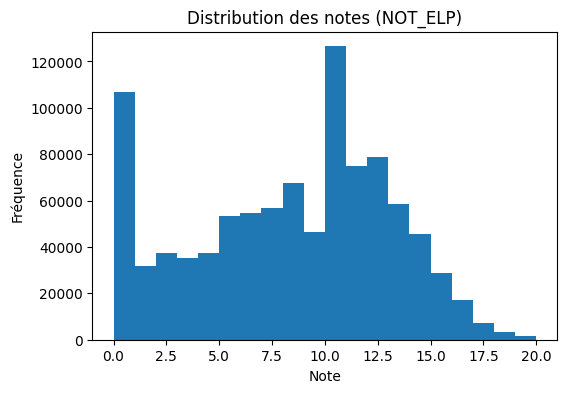

In [31]:
import matplotlib.pyplot as plt

clean_notes = pd.to_numeric(df["NOT_ELP"], errors='coerce')

plt.figure(figsize=(6,4))
plt.hist(clean_notes.dropna(), bins=20)
plt.title("Distribution des notes (NOT_ELP)")
plt.xlabel("Note")
plt.ylabel("Fréquence")
plt.show()


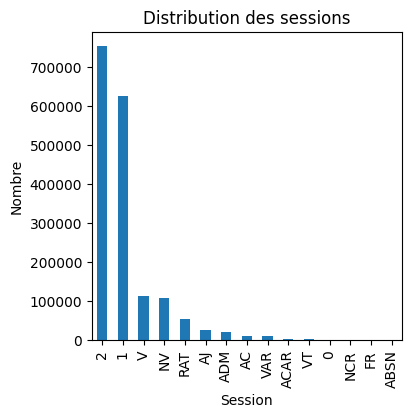

In [32]:
plt.figure(figsize=(4,4))
df["COD_SES"].value_counts().plot(kind="bar")
plt.title("Distribution des sessions")
plt.xlabel("Session")
plt.ylabel("Nombre")
plt.show()


In [33]:
print("\n📌 SYNTHÈSE DES PROBLÈMES DE QUALITÉ")

print(f"- Valeurs manquantes : {df.isna().sum().sum()} valeurs")
print(f"- Lignes anormales (7 colonnes) : {len(structural_issues)}")
# print(f"- Notes non numériques : {len(invalid_notelp)}")
print(f"- Sessions invalides : {len(invalid_sessions)}")
print(f"- Doublons : {duplicates}")



📌 SYNTHÈSE DES PROBLÈMES DE QUALITÉ
- Valeurs manquantes : 2940389 valeurs
- Lignes anormales (7 colonnes) : 391605
- Sessions invalides : 391788
- Doublons : 0


## Définition des métriques DQ

In [34]:
import numpy as np

# Convertir les colonnes numériques
df["COD_ANU"] = pd.to_numeric(df["COD_ANU"], errors="coerce")
df["COD_ETU"] = pd.to_numeric(df["COD_ETU"], errors="coerce")
df["NOT_ELP_NUM"] = pd.to_numeric(df["NOT_ELP"], errors="coerce")
df["COD_SES"] = pd.to_numeric(df["COD_SES"], errors="coerce")


In [35]:
def completeness(df):
    return (df.notna().sum() / len(df) * 100).round(2)

compl = completeness(df)
print("✅ Complétude (%) :\n", compl)


✅ Complétude (%) :
 COD_ANU        100.00
COD_ETU        100.00
COD_ELP        100.00
NOT_ELP         54.76
COD_TRE         60.35
COD_SES         77.87
EXTRA           22.13
NOT_ELP_NUM     54.76
dtype: float64


In [36]:
def accuracy(df):
    total = len(df)
    valid_ses = df["COD_SES"].isin([1,2]).sum()
    valid_note = df["NOT_ELP_NUM"].between(0,20).sum()
    return round((valid_ses + valid_note)/(2*total)*100,2)

acc = accuracy(df)
print("✅ Exactitude (%) :", acc)


### COD_SES ∈ {1,2}
##NOT_ELP_NUM ∈ [0,20] si présent

✅ Exactitude (%) : 66.31


In [37]:
def consistency(df):
    cond = df[(df["COD_TRE"]=="V") & (df["NOT_ELP_NUM"].isna())]
    return round((1 - len(cond)/len(df))*100,2)

cons = consistency(df)
print("✅ Cohérence (%) :", cons)


✅ Cohérence (%) : 99.97


In [38]:
def uniqueness(df):
    total = len(df)
    unique_rows = df.drop_duplicates(subset=["COD_ETU","COD_ELP","COD_SES"])
    return round(len(unique_rows)/total*100,2)

uniq = uniqueness(df)
print("✅ Unicité (%) :", uniq)


✅ Unicité (%) : 94.12


In [39]:
def validity_format(df):
    valid_anu = df["COD_ANU"].between(2000,2100).sum()  # 4 chiffres
    valid_etu = df["COD_ETU"].notna().sum()
    return round((valid_anu + valid_etu)/(2*len(df))*100,2)

val_form = validity_format(df)
print("✅ Validité & Format (%) :", val_form)


✅ Validité & Format (%) : 100.0


In [40]:
def extreme_values(df):
    total = len(df)
    extreme = df[(df["NOT_ELP_NUM"]<0) | (df["NOT_ELP_NUM"]>20)]
    return round((1 - len(extreme)/total)*100,2)

extrem = extreme_values(df)
print("✅ Valeurs extrêmes (%) :", extrem)


✅ Valeurs extrêmes (%) : 100.0


In [41]:
def session_distribution(df):
    valid_ses = df["COD_SES"].isin([1,2]).sum()
    return round(valid_ses/len(df)*100,2)

dist_ses = session_distribution(df)
print("✅ Distribution sessions (%) :", dist_ses)


✅ Distribution sessions (%) : 77.86


In [42]:
metrics = [compl.mean(), acc, cons, uniq, val_form, extrem, dist_ses]
global_score = round(np.mean(metrics),2)
print("\n🏆 Score global de qualité des données (%) :", global_score)



🏆 Score global de qualité des données (%) : 87.07
